**We will write a code to plot the stress distribution in thick and compound cylinders.**

The inputs that we will be taking from the user are:

1) Internal Pressure in MPa
2) The diameters in mm
3) Maximum permissible stress

Lame's General Equations will be used.

**Github repository link :**
https://github.com/jeetThakkar10/MD_CP.git

**Project Submitted by :**

1) Jeet Thakkar          (2GI19ME052)

2) Aniket Ankle          (2GI19ME017)

3) Gourav Malavi         (2GI19ME042)

4) Hrishikesh Chavan     (2GI19ME047)

**Reference :**

Design of Machine Elements by V. B. Bhandari

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Thick Cylinders**

In [62]:
def SplitIntoArray(D_in, D_out):
    
    '''
    This function will generate a numpy array of Diameters
    Between Inner Dia and Outer Dia with a step
    size of 0.1mm
    This is done in order to get multiple points for stress calculation
    '''
    
    
    try:
        if D_in<0 or D_out<0 or D_in>D_out:    #This will make sure the values entered are positive and valid
            raise ValueError("Invalid Entry. Please enter valid data. ")
    except ValueError as e:
        print(e)
        
    lst = np.arange(D_in, D_out, 0.5)
    return(lst)
        

In [63]:
def FindTanStress(D_in, D_out, InternalPressure):
    
    '''
    This function will find the tangential
    stress given the inner diameter,
    outer diameter and the internal pressure
    '''
     
    lst = list(SplitIntoArray(D_in, D_out))
    TanStress = []
    for r in lst:
        r/=2    #Since radius = Diameter/2
        TanStr = ((InternalPressure*D_in**2)/(D_out**2-D_in**2))*(1+(D_out**2/(4*r**2)))    #lame's equation
        TanStress.append(TanStr)
    return TanStress    
        

In [64]:
def FindRadStress(D_in, D_out, InternalPressure):
    '''
    This Function will find the radial stress
    '''
    lst = list(SplitIntoArray(D_in, D_out))
    RadStress = []
    for r in lst:
        r/=2
        RadStr = ((InternalPressure*D_in**2)/(D_out**2-D_in**2))*(1-(D_out**2/(4*r**2)))    #Lame's equation
        RadStress.append(RadStr)
    return RadStress
        

In [65]:
def PlotGraph(D_in, D_out, InternalPressure):

    radius = np.array(SplitIntoArray(D_in, D_out))
    radius = radius/2
    TanStress = FindTanStress(D_in, D_out, InternalPressure)
    RadStress = FindRadStress(D_in, D_out, InternalPressure)

    plt.figure(1)
    
    plt.subplot(211)
    plt.title("Stress distribution in thick cylinders")
    plt.grid()
    plt.plot(radius, TanStress)
    plt.xlabel("Radius")
    plt.ylabel("Tangential Stress")
    
    plt.subplot(212)
    plt.grid()
    plt.plot(radius, RadStress, color='green')
    plt.xlabel("Radius")
    plt.ylabel("Radial Stress")
    plt.show()    

**Compound Cylinders**

In [66]:
def PressureShrinkFit(d1,d2,d3, MaxPStress):    
    '''
    This fundtion will determine the pressure
    due to shrink fit, given the Max Permissible Stress
    '''
    
    ShrinkagePressure = MaxPStress*(d3**2-d2**2)/(d3**2+d2**2)
    return ShrinkagePressure

In [67]:
def StressShrinkJacketRad(P,d2,d3):
    
    '''
    This function will return a numpy array 
    of Radial Sress induced in the jacket from d2 to d3
    in incriments of 0.5. The input arguments are
    Pressure due to shrink fit, d2, d3
    '''
    
    Stress = []
    lst=np.arange(d2/2, (d3+1)/2, 0.5)
    for r in lst:
        StressJacketShrinkRad = ((P*d2**2)/(d3**2-d2**2))*((d3**2/(4*r**2))-1)*(-1)
        Stress.append(StressJacketShrinkRad)
    return(Stress)

In [68]:
def StressShrinkJacketTan(P,d2,d3):
    '''
    This function will return a numpy array 
    of Tangential Sress induced in the jacket from d2 to d3
    in incriments of 0.5. The input arguments are
    Pressure due to shrink fit, d2, d3
    '''
    Stress = []
    lst=np.arange(d2/2, (d3+1)/2, 0.5)
    for r in lst:
        StressJacketShrinkRad = ((P*d2**2)/(d3**2-d2**2))*((d3**2/(4*r**2))+1)
        Stress.append(StressJacketShrinkRad)
    return(Stress)

In [69]:
def StressShrinkInnerRad(P,d1,d2):
    
    '''
    This function will return a numpy array of Radial stress induced 
    in the Inner cylinder due to shrink fit. 
    The input arguments are Pressure due to shrink fit, d1,d2
    '''
    
    Stress = []
    lst=np.arange(d1/2, (d2+1)/2, 0.5)
    for r in lst:
        StressInnerShrinkRad = (-1)*((P*d2**2)/(d2**2-d1**2))*(1-((d1**2)/(4*r**2)))
        Stress.append(StressInnerShrinkRad)
    return(Stress)

In [70]:
def StressShrinkInnerTan(P,d1,d2):
    
    '''
    This function will return a numpy array of Tangential stress induced 
    in the Inner cylinder due to shrink fit. 
    The input arguments are Pressure due to shrink fit, d1,d2
    '''
    
    Stress = []
    lst=np.arange(d1/2, (d2+1)/2, 0.5)
    for r in lst:
        StressInnerShrinkRad = (-1)*((P*d2**2)/(d2**2-d1**2))*(1+((d1**2)/(4*r**2)))
        Stress.append(StressInnerShrinkRad)
    return(Stress)

In [71]:
def RadStressInernalPressure(Pi, d1, d3):
    '''
    This function will return a numpy array of 
    Radial Stress Induced in the compound cylinder 
    due to shrink fit. 
    The input arguments are Internal Pressure,
    d1, d3
    '''
    Stress = []
    lst = np.arange(d1/2, (d3+1)/2, 0.5)
    for r in lst:
        RadStress = (-1)*((Pi*d1**2)/(d3**2-d1**2))*(((d3**2)/(4*r**2))-1)
        Stress.append(RadStress)
    return(Stress)


In [72]:
def TanStressInernalPressure(Pi, d1, d3):

    '''
    This function will return a numoy array of 
    Tangential Stress Induced in the compound cylinder 
    due to shrink fit. 
    The input arguments are Internal Pressure,
    d1, d3
    '''
    
    Stress = []
    lst = np.arange(d1/2, (d3+1)/2, 0.5)
    for r in lst:
        TanStress = ((Pi*d1**2)/(d3**2-d1**2))*(((d3**2)/(4*r**2))+1)
        Stress.append(TanStress)
    return(Stress)


In [73]:
def mergeradial(P, d1,d2, d3):
    
    '''
    Since we have the radial stresses of inner cylinder
    and jacket separately, we use this function to 
    merge them together in the order starting from d1 to d3
    '''
    
    StressInner = StressShrinkInnerRad(P, d1, d2)
    StressOuter = StressShrinkJacketRad(P, d2, d3)
    StressInner.extend(StressOuter)
    return(StressInner)

In [74]:
def mergetangential(P, d1, d2, d3):
    
    '''
    Since we have the tangential stresses of inner cylinder
    and jacket separately, we use this function to 
    merge them together in the order starting from d1 to d3
    '''
        
    StressInner = StressShrinkInnerTan(P, d1, d2)
    StressOuter = StressShrinkJacketTan(P,d2,d3)
    StressInner.extend(StressOuter)
    return(StressInner)

In [75]:
def resultantRadial(P, Pi, d1, d2, d3):
    
    '''
    This function will return a numpy array of 
    resultant radial stress which can be calculated by 
    superimposing stresses due to shrink fit and those due to
    internal pressure
    '''
    
    radialStress1 = mergeradial(P, d1, d2, d3)
    radialStress2 = RadStressInernalPressure(Pi, d1, d3)

    radialStress1 = np.array(radialStress1)
    radialStress2 = np.array(radialStress2)
    
    if np.shape(radialStress1)!=np.shape(radialStress2):
        if np.shape(radialStress1)>np.shape(radialStress2):
            radialStress2 = np.append(radialStress2,np.NaN)
        else:
            radialStress1 = np.append(radialStress1,np.NaN)
    
    return(radialStress1+radialStress2)   

In [76]:
def resultantTangential(P, Pi, d1, d2, d3):
    
    '''
    This function will return a numpy array of 
    resultant rtangential stress which can be calculated by 
    superimposing stresses due to shrink fit and those due to
    internal pressure
    '''
    
    tanStress1 = mergetangential(P, d1, d2, d3)
    tanStress2 = TanStressInernalPressure(Pi, d1, d3)
    tanStress1 = np.array(tanStress1)
    tanStress2 = np.array(tanStress2)

    if np.shape(tanStress1)!=np.shape(tanStress2):
        if np.shape(tanStress1)>np.shape(tanStress2):
            tanStress2 = np.append(tanStress2,np.NaN)
        else:
            tanStress1 = np.append(tanStress1,np.NaN)
    return(tanStress1 + tanStress2)


In [77]:
def plotResultant(P, Pi, d1, d2, d3):

    '''
    This function will plot the resultant stresses having radius
    on the x-axis and Resultant stress on the y-axis
    '''
    
    rad = np.arange(d1/2, (d3+1)/2, 0.5)    #Getting an array of radius (for x-axis)
    radial = resultantRadial(P, Pi, d1, d2, d3)
    tan = resultantTangential(P, Pi, d1, d2, d3)

    if np.shape(rad)!=np.shape(radial):
        if np.shape(rad)>np.shape(radial):
            radial = np.append(radial,np.NaN)
        else:
            rad = np.append(rad,np.NaN)
            
    if np.shape(rad)!=np.shape(tan):
        if np.shape(rad)>np.shape(tan):
            tan = np.append(tan,np.NaN)
        else:
            rad = np.append(rad,np.NaN)
    
    plt.figure(1)
    plt.title("Resultant Radial Stress in Compound Cylinder")
    plt.grid()
    plt.plot(rad, radial)
    plt.show
    plt.xlabel("Radius (mm)")
    plt.ylabel("Resultant Radial Stress (MPa)")
    
    plt.figure(2)
    plt.title("Resultant Tangential Stress in Compound Cylinder")
    plt.grid()
    plt.plot(rad, tan)
    plt.xlabel("Radius (mm)")
    plt.ylabel("Resultant Tangential Stress (MPa)")
    plt.show()
                             

Enter the internal diameter of the thick cylinder in mm : 300
Enter the outer diameter of the thick cylinder in mm  : 380
Enter the Internal Pressure in the thick cylinder in MPa : 6


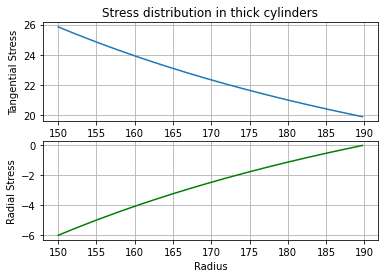

Enter the internal diameter of the inner cylinder (mm): 20
Enter the external diameter of inner cylinder (mm): 40
Enter the external diameter of the outer cylinder (mm): 60
Enter the maximum permissible stress (MPa): 100
Enter the internal pressure (MPa): 300


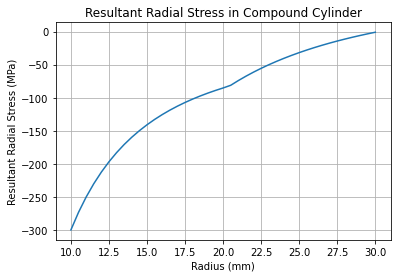

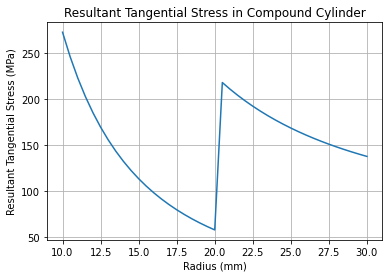

In [78]:
# n = int(input("Enter 1 for Thick Cylinders or 2 for Compound Cylinder : "))

# if n==1: 
# Thick Cylinder
innerDia = float(input("Enter the internal diameter of the thick cylinder in mm : "))
outerDia = float(input("Enter the outer diameter of the thick cylinder in mm  : "))
intPressure = float(input("Enter the Internal Pressure in the thick cylinder in MPa : "))
PlotGraph(innerDia, outerDia, intPressure) 

# elif n==2:
# Compound Cylinder
d1 = float(input("Enter the internal diameter of the inner cylinder (mm): "))
d2 = float(input("Enter the external diameter of inner cylinder (mm): "))
d3 = float(input("Enter the external diameter of the outer cylinder (mm): "))
MaxStress = float(input("Enter the maximum permissible stress (MPa): "))
Pi = float(input("Enter the internal pressure (MPa): "))
P = PressureShrinkFit(d1,d2,d3, MaxStress)
plotResultant(P, Pi, d1, d2, d3)
    
# else:
#     print("Invalid Input. Please enter a valid input. ")